In [112]:
import pandas as pd
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import seaborn as sns


In [4]:
df_tweet = pd.read_csv('C:/Users/Bani/binar-data-science/Gold Challenge Binar _ DSC10_Alfian Bani Kusuma/data/data.csv', encoding='latin-1')
abusive = pd.read_csv('C:/Users/Bani/binar-data-science/Gold Challenge Binar _ DSC10_Alfian Bani Kusuma/data/abusive.csv')
df_newkamusalay = pd.read_csv('C:/Users/Bani/binar-data-science/Gold Challenge Binar _ DSC10_Alfian Bani Kusuma/data/new_kamusalay.csv', encoding='latin-1')

In [5]:
df_newkamusalay

,anakjakartaasikasik,anak jakarta asyik asyik
0,pakcikdahtua,pak cik sudah tua
1,pakcikmudalagi,pak cik muda lagi
2,t3tapjokowi,tetap jokowi
3,3x,tiga kali
4,aamiin,amin
...,...,...
15161,mendikbud,menteri pendidikan dan kebudayaan
15162,mendag,menteri perdagangan
15163,menaker,menteri tenaga kerja
15164,memetwit,mentwit


In [114]:
df_tweet

,Tweet,length_of_tweet,length_of_words
0,- disaat semua cowok berusaha melacak perhatia...,138,25
1,RT USER: USER siapa yang telat ngasih tau elu?...,120,21
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",254,37
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,75,14
4,USER USER Kaum cebong kapir udah keliatan dong...,89,14
...,...,...,...
13164,USER jangan asal ngomong ndasmu. congor lu yg ...,61,10
13165,USER Kasur mana enak kunyuk',28,5
13166,USER Hati hati bisu :( .g\n\nlagi bosan huft \...,62,9
13167,USER USER USER USER Bom yang real mudah terdet...,135,22


In [115]:
df

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13164,USER jangan asal ngomong ndasmu. congor lu yg ...,1,1,1,0,0,0,1,0,0,1,0,0
13165,USER Kasur mana enak kunyuk',0,1,0,0,0,0,0,0,0,0,0,0
13166,USER Hati hati bisu :( .g\n\nlagi bosan huft \...,0,0,0,0,0,0,0,0,0,0,0,0
13167,USER USER USER USER Bom yang real mudah terdet...,0,0,0,0,0,0,0,0,0,0,0,0


# TEXT ANALYSIS BEFORE CLEANING

In [168]:
# Lowercasing all of the tweet
before_cleansing_tweet = df_tweet["Tweet"].str.lower()
before_cleansing_tweet_str = df_tweet.to_string()

In [7]:
# Check null value
before_cleansing_tweet.isna().sum()

0

In [164]:
type(before_cleansing_tweet)

pandas.core.series.Series

# word cloud analysis

In [8]:
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(before_cleansing_tweet_str)

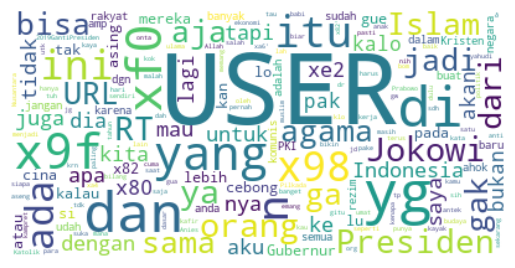

In [9]:
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Word used and frequency

In [10]:
word_count = Counter(" ".join(before_cleansing_tweet).split()).most_common(10)
word_frequency = pd.DataFrame(word_count, columns = ['Word', 'Frequency'])
print(word_frequency)

   Word  Frequency
0  user      15385
1    yg       2913
2   dan       2715
3    di       2694
4  yang       1982
5   itu       1490
6   ada       1280
7   ini       1230
8     ;       1225
9    rt        957


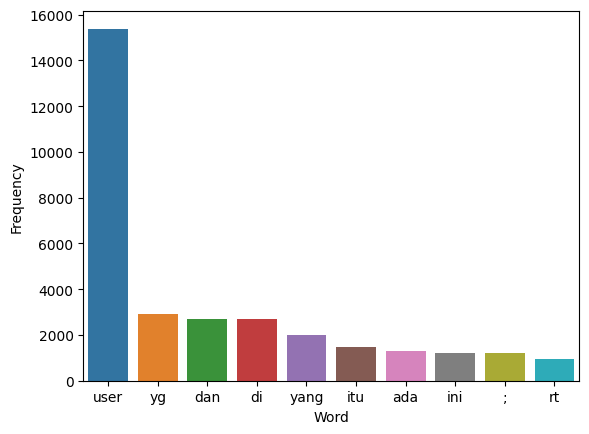

In [11]:
before_cleansing_barchart = sns.barplot(x = 'Word',y = 'Frequency',data = word_frequency)

# word and sentence length and count before cleansing

In [86]:
df_tweet = df_tweet[['Tweet']]

In [90]:
df_tweet['length_of_tweet'] = df_tweet['Tweet'].apply(lambda x: len(x))

C:\Users\Bani\AppData\Local\Temp\ipykernel_10940\143447267.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweet['length_of_tweet'] = df_tweet['Tweet'].apply(lambda x: len(x))


In [97]:
df_tweet['length_of_tweet'].sum() #Jumlah karakter yang terdapat dalam sampel tweet

1503936

In [94]:
df_tweet['length_of_words'] = df_tweet['Tweet'].apply(lambda x: len(x.split()))

C:\Users\Bani\AppData\Local\Temp\ipykernel_10940\4111842143.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweet['length_of_words'] = df_tweet['Tweet'].apply(lambda x: len(x.split()))


<Axes: >

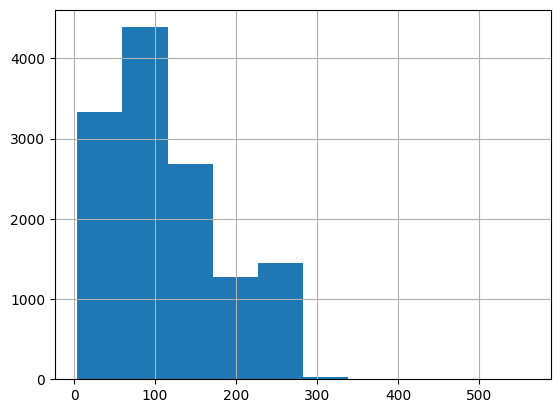

In [95]:
df_tweet['length_of_tweet'].hist()

<Axes: >

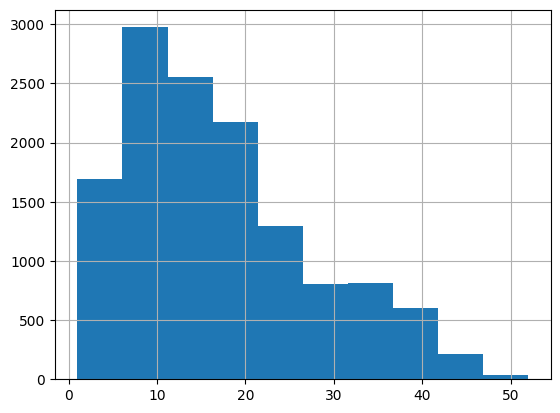

In [96]:
df_tweet['length_of_words'].hist()

In [138]:
sum_before_word = df_tweet['length_of_words'].sum() #Jumlah kata yang terdapat dalam sampel tweet
print(sum_before_word)

227588


In [139]:
sum_before_tweet = df_tweet['length_of_tweet'].sum() #Jumlah karakter yang terdapat dalam tweet
print(sum_before_tweet)

1503936


# Abusive words analytics

### How many abusive words in the tweets

In [19]:
array_of_abusive_words = abusive.ABUSIVE.values

In [20]:
array_of_abusive_words

array(['alay', 'ampas', 'buta', 'keparat', 'anjing', 'anjir', 'babi',
       'bacot', 'bajingan', 'banci', 'bandot', 'buaya', 'bangkai',
       'bangsat', 'bego', 'bejat', 'bencong', 'berak', 'bisu', 'celeng',
       'jancuk', 'bodoh', 'berengsek', 'budek', 'burik', 'jamban',
       'cocot', 'congor', 'culun', 'cupu', 'dongok', 'dungu', 'edan',
       'tai', 'ngewe', 'geblek', 'gembel', 'gila', 'goblok', 'iblis',
       'idiot', 'jablay', 'jembud', 'jembut', 'jijik', 'kacrut', 'kafir',
       'modar', 'kampang', 'kampret', 'kampungan', 'kimak', 'kontol',
       'kunti', 'tuyul', 'kunyuk', 'mampus', 'memek', 'monyet', 'najis',
       'nete', 'ngentot', 'noob', 'pecun', 'perek', 'sampah', 'sarap',
       'setan', 'silit', 'bokong', 'sinting', 'sompret', 'sontoloyo',
       'terkutuk', 'titit', 'pantat', 'tolol', 'udik', 'antek', 'asing',
       'ateis', 'sitip', 'autis', 'picek', 'ayam kampus', 'bani kotak',
       'bispak', 'bisyar', 'bokep', 'bong', 'cacat', 'cct', 'cebong',
       'ta

In [21]:
df_tweet['abusive_word_mentioned'] = df_tweet['Tweet'].apply(lambda x: sum([1 if word.lower() in array_of_abusive_words else 0 for word in x.split(" ")]))

In [22]:
type(df_tweet)

pandas.core.frame.DataFrame

In [23]:
df_tweet['abusive_word_mentioned'].value_counts()

abusive_word_mentioned
0     8222
1     4047
2      716
3      138
4       30
5        8
6        4
7        2
15       1
8        1
Name: count, dtype: int64

# Text cleansing 

In [24]:
tweets_to_clean = df_tweet['Tweet']

In [25]:
tweets_to_clean = tweets_to_clean.tolist()

In [26]:
tweets_to_clean

["- disaat semua cowok berusaha melacak perhatian gue. loe lantas remehkan perhatian yg gue kasih khusus ke elo. basic elo cowok bego ! ! !'",
 "RT USER: USER siapa yang telat ngasih tau elu?edan sarap gue bergaul dengan cigax jifla calis sama siapa noh licew juga'",
 '41. Kadang aku berfikir, kenapa aku tetap percaya pada Tuhan padahal aku selalu jatuh berkali-kali. Kadang aku merasa Tuhan itu ninggalkan aku sendirian. Ketika orangtuaku berencana berpisah, ketika kakakku lebih memilih jadi Kristen. Ketika aku anak ter',
 "USER USER AKU ITU AKU\\n\\nKU TAU MATAMU SIPIT TAPI DILIAT DARI MANA ITU AKU'",
 "USER USER Kaum cebong kapir udah keliatan dongoknya dari awal tambah dongok lagi hahahah'",
 "USER Ya bani taplak dkk \\xf0\\x9f\\x98\\x84\\xf0\\x9f\\x98\\x84\\xf0\\x9f\\x98\\x84'",
 'deklarasi pilkada 2018 aman dan anti hoax warga dukuh sari jabon',
 'Gue baru aja kelar re-watch Aldnoah Zero!!! paling kampret emang endingnya! 2 karakter utama cowonya kena friendzone bray! XD URL',
 'Na

In [30]:
def text_cleaning_other(input_text):
    text = re.sub(r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Za-z]{2,}\b', 'EMAIL', input_text) #Mengganti email address menjadi EMAIL
    text = text.lower() # jadikan lowercase semua
    text = re.sub(r'[^\w\s]', '', text) # hapus semua punctuation (tanda baca)
    text = text.replace(" 62"," 0") # Mengganti angka 62 di telfon menjadi angka 0
    text = re.sub(r"\b\d{4}\s?\d{4}\s?\d{4}\b", "NOMOR_TELEPON", text) #ganti nomor telepon ke kata 'NOMOR_TELEPON'
    text = text.replace("user"," ") # Menghapus kata user
    text = text.replace("url"," ") # Menghapus kata url
    text = text.strip() # Menghapus whitespace
    text = re.sub(r'x[a-z{1}][0-9,{2}]', " ",text) # Menghapus emoticon yang ter-encode
    text = re.sub(r'x[0-9,{2}][a-z{1}]', " ",text) # Menghapus emoticon yang ter-encode
    text = re.sub(r'(.)\1+', r'\1', text) # Menghapus huruf berulang
    text = re.sub(r'(x98)|(x84)|(x86)|(x9xa[a-z])|(x82)|(x8[0-9])|(x9[0-9])|x|(dx9)|(xc[a-z])|(dxcexafxce)|(ð)', " ",text) # Menghapus emoticon yang ter-encode
    text = processing_abusive_acronym(text)
    
    return(text)



In [31]:
cleaned_text = df_tweet['Tweet'].apply(lambda x: text_cleaning_other(x))
print(cleaned_text)

0        disat semua cowok berusaha melacak perhatian g...
1        rt siapa yang telat memberi tau eluedan gue be...
2        41 kadang aku berpikir kenapa aku tetap percay...
3        aku itu akunku tau matamu tapi dilihat dari ma...
4        kaum kafir sudah kelihatan dongoknya dari awal...
                               ...                        
13164    jangan asal berbicara ndasmu kamu yang sekata ...
13165                                      kasur mana enak
13166                       hati hati gnlagi bosan duh   a
13167    bom yang real mudah terdeteksi bom yang terkub...
13168             mana situ memberi itu cuma foto ya kutil
Name: Tweet, Length: 13169, dtype: object


# word and sentence length and count after cleansing

In [35]:
type(cleaned_text)

pandas.core.series.Series

In [46]:
#df_tweet['clean_word_length'] = df_tweet['Tweet'].apply(lambda x: len(x.split()))

In [146]:
clean_tweet_length = df_tweet['Tweet'].apply(lambda x: len(text_cleaning_other(x)))
print(clean_tweet_length)

0        126
1        102
2        246
3         56
4         63
        ... 
13164     57
13165     15
13166     30
13167    112
13168     40
Name: Tweet, Length: 13169, dtype: int64


In [144]:
clean_word_length = df_tweet['Tweet'].apply(lambda x: len(text_cleaning_other(x).split()))

In [145]:
df_tweet

,Tweet,length_of_tweet,length_of_words,sum_before_word,clean_tweet_length,clean_word_length
0,- disaat semua cowok berusaha melacak perhatia...,138,25,227588,126,20
1,RT USER: USER siapa yang telat ngasih tau elu?...,120,21,227588,102,18
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",254,37,227588,246,38
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,75,14,227588,56,11
4,USER USER Kaum cebong kapir udah keliatan dong...,89,14,227588,63,10
...,...,...,...,...,...,...
13164,USER jangan asal ngomong ndasmu. congor lu yg ...,61,10,227588,57,9
13165,USER Kasur mana enak kunyuk',28,5,227588,15,3
13166,USER Hati hati bisu :( .g\n\nlagi bosan huft \...,62,9,227588,30,6
13167,USER USER USER USER Bom yang real mudah terdet...,135,22,227588,112,18


In [147]:
sum_cleaned_tweet = clean_tweet_length.sum()
print(sum_cleaned_tweet)

1379520


In [148]:
sum_cleaned_word = clean_word_length.sum()
print(sum_cleaned_word)

211582


In [117]:
cleaned_text_str = cleaned_text.to_string()

In [120]:
word_cloud_cleaned = WordCloud(collocations = False, background_color = 'white').generate(cleaned_text_str)

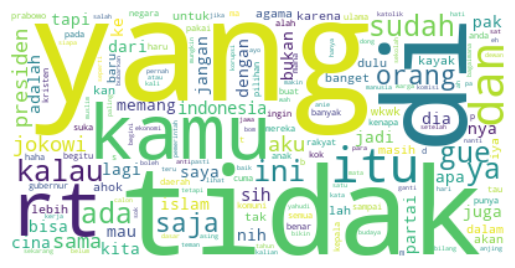

In [121]:
plt.imshow(word_cloud_cleaned, interpolation='bilinear')
plt.axis("off")
plt.show()

# Cleaning abusive word and change acronym

In [40]:
list_of_abusive = abusive['ABUSIVE'].tolist()

In [28]:
new_df_newkamusalay = {}
for k,v in df_newkamusalay.values:
    new_df_newkamusalay[k] = v
print(new_df_newkamusalay)

{'pakcikdahtua': 'pak cik sudah tua', 'pakcikmudalagi': 'pak cik muda lagi', 't3tapjokowi': 'tetap jokowi', '3x': 'tiga kali', 'aamiin': 'amin', 'aamiinn': 'amin', 'aamin': 'amin', 'aammiin': 'amin', 'abis': 'habis', 'abisin': 'habiskan', 'acau': 'kacau', 'achok': 'ahok', 'ad': 'ada', 'adek': 'adik', 'adl': 'adalah', 'adlah': 'adalah', 'adlh': 'adalah', 'ado': 'ada', 'aduhh': 'aduh', 'aer': 'air', 'afdol': 'afdal', 'agamaataualqur': 'agama alquran', 'agm': 'agama', 'agma': 'agama', 'ahaha': 'haha', 'ahahaha': 'haha', 'ahehehehe': 'hehe', 'ahir': 'akhir', 'ahirnya': 'akhirnya', 'ahk': 'ahok', 'ahlamdulillah': 'alhamdulillah', 'ahli2': 'para ahli', 'ahlusunnah': 'ahlus sunah', 'ahmaddani': 'ahmad dhani', 'aho': 'ahok', 'ahoax': 'ahok', 'ahoaxx': 'ahok', 'ahog': 'ahok', 'ahokataudjarot': 'ahok djarot', 'ahokbebanijokowi': 'ahok beban jokowi', 'ahokbtp': 'ahok basuki tjahaja purnama', 'ahokditolakwarga': 'ahok ditolak warga', 'ahokdjarot': 'ahok djarot', 'ahokdjarotterbukti': 'ahok djarot 

In [29]:
def processing_abusive_acronym(input_text):
    new_abusive_list = [] 
    new_new_abusive_list = [] 
    text = input_text.split(" ") 
    for word in text: 
        if word in list_of_abusive : 
            continue 
        else:
            new_abusive_list.append(word) 
   
    for word in new_abusive_list:
        new_word = new_df_newkamusalay.get(word, word)
        new_new_abusive_list.append(new_word)
    
    text = " ".join(new_new_abusive_list)
    return text

In [93]:
list_of_abusive

['alay',
 'ampas',
 'buta',
 'keparat',
 'anjing',
 'anjir',
 'babi',
 'bacot',
 'bajingan',
 'banci',
 'bandot',
 'buaya',
 'bangkai',
 'bangsat',
 'bego',
 'bejat',
 'bencong',
 'berak',
 'bisu',
 'celeng',
 'jancuk',
 'bodoh',
 'berengsek',
 'budek',
 'burik',
 'jamban',
 'cocot',
 'congor',
 'culun',
 'cupu',
 'dongok',
 'dungu',
 'edan',
 'tai',
 'ngewe',
 'geblek',
 'gembel',
 'gila',
 'goblok',
 'iblis',
 'idiot',
 'jablay',
 'jembud',
 'jembut',
 'jijik',
 'kacrut',
 'kafir',
 'modar',
 'kampang',
 'kampret',
 'kampungan',
 'kimak',
 'kontol',
 'kunti',
 'tuyul',
 'kunyuk',
 'mampus',
 'memek',
 'monyet',
 'najis',
 'nete',
 'ngentot',
 'noob',
 'pecun',
 'perek',
 'sampah',
 'sarap',
 'setan',
 'silit',
 'bokong',
 'sinting',
 'sompret',
 'sontoloyo',
 'terkutuk',
 'titit',
 'pantat',
 'tolol',
 'udik',
 'antek',
 'asing',
 'ateis',
 'sitip',
 'autis',
 'picek',
 'ayam kampus',
 'bani kotak',
 'bispak',
 'bisyar',
 'bokep',
 'bong',
 'cacat',
 'cct',
 'cebong',
 'taplak',
 'cu

In [41]:
cleaned_text_abusive = cleaned_text.apply(lambda x: processing_abusive_acronym(x))

In [42]:
cleaned_text_abusive

0        disat semua cowok berusaha melacak perhatian g...
1        rt siapa yang telat memberi tau eluedan gue be...
2        41 kadang aku berpikir kenapa aku tetap percay...
3        aku itu akunku tau matamu tapi dilihat dari ma...
4        kaum sudah kelihatan dongoknya dari awal tamba...
                               ...                        
13164    jangan asal berbicara ndasmu kamu yang sekata ...
13165                                      kasur mana enak
13166                      hati hati gnlagi bosan aduh   a
13167    bom yang real mudah terdeteksi bom yang terkub...
13168             mana situ memberi itu cuma foto ya kutil
Name: Tweet, Length: 13169, dtype: object

# analysis after abusive word cleaning

In [43]:
df_tweet['clean_abusive_tweet_length'] = cleaned_text_abusive.apply(lambda x: len(x))

In [44]:
df_tweet['clean_abusive_tweet_length']

0        126
1        102
2        246
3         56
4         57
        ... 
13164     50
13165     15
13166     31
13167    112
13168     40
Name: clean_abusive_tweet_length, Length: 13169, dtype: int64

In [45]:
df_tweet['clean_abusive_word_length'] = cleaned_text_abusive.apply(lambda x: len(x.split()))

In [46]:
df_tweet

,Tweet,length_of_tweet,length_of_words,abusive_word_mentioned,clean_tweet_length,clean_word_length,clean_abusive_tweet_length,clean_abusive_word_length
0,- disaat semua cowok berusaha melacak perhatia...,138,25,1,126,20,126,20
1,RT USER: USER siapa yang telat ngasih tau elu?...,120,21,1,102,18,102,18
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",254,37,0,246,38,246,38
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,75,14,1,56,11,56,11
4,USER USER Kaum cebong kapir udah keliatan dong...,89,14,2,63,10,57,9
...,...,...,...,...,...,...,...,...
13164,USER jangan asal ngomong ndasmu. congor lu yg ...,61,10,1,57,9,50,8
13165,USER Kasur mana enak kunyuk',28,5,0,15,3,15,3
13166,USER Hati hati bisu :( .g\n\nlagi bosan huft \...,62,9,1,30,6,31,6
13167,USER USER USER USER Bom yang real mudah terdet...,135,22,0,112,18,112,18


In [47]:
sum_cleaned_abusive_tweet = df_tweet['clean_abusive_tweet_length'].sum()
print(sum_cleaned_abusive_tweet)

1366414


In [48]:
sum_cleaned_abusive_word = df_tweet['clean_abusive_word_length'].sum()
print(sum_cleaned_abusive_word)

209697


In [49]:
cleaned_abusive_str = cleaned_text_abusive.to_string()

In [50]:
word_abusive_cleaned = WordCloud(collocations = False, background_color = 'white').generate(cleaned_abusive_str)

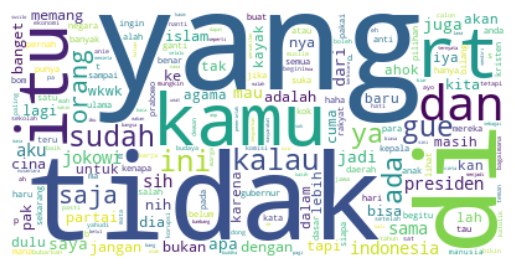

In [51]:
plt.imshow(word_abusive_cleaned, interpolation='bilinear')
plt.axis("off")
plt.show()

In [126]:
word_count_clean = Counter(" ".join(cleaned_text_abusive).split()).most_common(10)
word_frequency_clean = pd.DataFrame(word_count_clean, columns = ['Word', 'Frequency'])
print(word_frequency_clean)

        Word  Frequency
0       yang       4971
1      tidak       3268
2         di       3120
3        dan       3107
4        itu       2074
5       kamu       1890
6        ini       1570
7  indonesia       1560
8        ada       1548
9   presiden       1439


In [125]:
word_count_clean

[('yang', 4971),
 ('tidak', 3268),
 ('di', 3120),
 ('dan', 3107),
 ('itu', 2074),
 ('kamu', 1890),
 ('ini', 1570),
 ('indonesia', 1560),
 ('ada', 1548),
 ('presiden', 1439)]

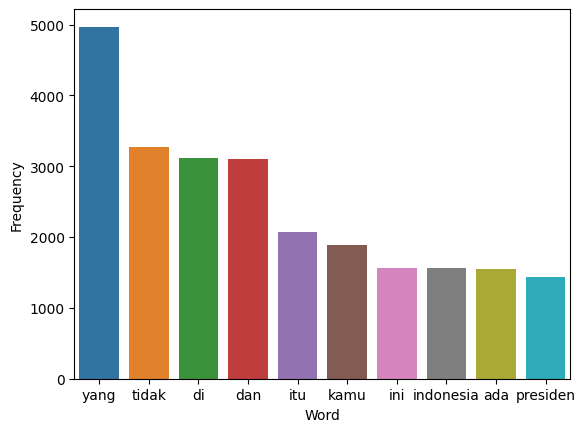

In [127]:
after_cleansing_barchart = sns.barplot(x = 'Word',y = 'Frequency',data = word_frequency_clean)

# Abusive word yg sering digunakan

In [165]:
abusive_tmp={}
for x in list_of_abusive:
    for text in before_cleansing_tweet:
        if x in text :
            try:
                abusive_tmp[x] = abusive_tmp[x] +1
            except KeyError:
                abusive_tmp[x] = 1

In [166]:
abusive_tmp

{'alay': 61,
 'ampas': 35,
 'buta': 144,
 'keparat': 41,
 'anjing': 149,
 'anjir': 160,
 'babi': 200,
 'bacot': 118,
 'bajingan': 141,
 'banci': 125,
 'bandot': 5,
 'buaya': 61,
 'bangkai': 50,
 'bangsat': 68,
 'bego': 123,
 'bejat': 32,
 'bencong': 49,
 'berak': 27,
 'bisu': 74,
 'celeng': 18,
 'jancuk': 27,
 'bodoh': 108,
 'berengsek': 1,
 'budek': 77,
 'burik': 18,
 'jamban': 51,
 'cocot': 63,
 'congor': 69,
 'culun': 39,
 'cupu': 28,
 'dongok': 15,
 'dungu': 187,
 'edan': 200,
 'tai': 534,
 'ngewe': 43,
 'geblek': 44,
 'gembel': 50,
 'gila': 114,
 'goblok': 153,
 'iblis': 61,
 'idiot': 97,
 'jablay': 42,
 'jembut': 10,
 'jijik': 49,
 'kacrut': 36,
 'kafir': 273,
 'modar': 20,
 'kampang': 54,
 'kampret': 188,
 'kampungan': 51,
 'kimak': 1,
 'kontol': 132,
 'kunti': 35,
 'tuyul': 18,
 'kunyuk': 104,
 'mampus': 65,
 'memek': 120,
 'monyet': 142,
 'najis': 63,
 'nete': 50,
 'ngentot': 118,
 'noob': 17,
 'pecun': 37,
 'perek': 35,
 'sampah': 91,
 'sarap': 66,
 'setan': 100,
 'silit': 47

In [169]:
sorted_abusive_tmp = sorted(abusive_tmp.items(), key=lambda x: x[1], reverse=True)

In [170]:
top_5 = sorted_abusive_tmp[:5]

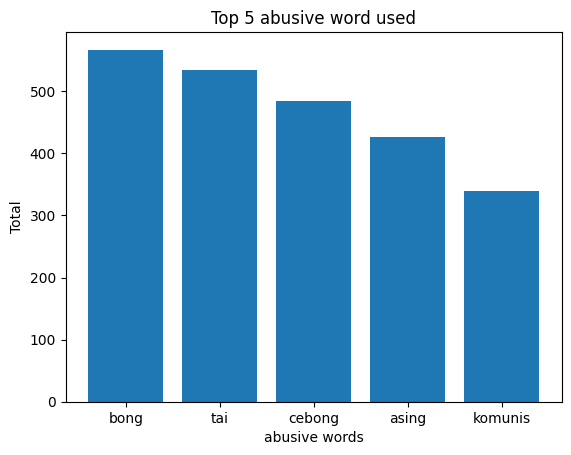

In [171]:
keys = [entry[0] for entry in top_5]
values = [entry[1] for entry in top_5]
plt.bar(keys, values)

# Add labels and title
plt.xlabel('abusive words')
plt.ylabel('Total')
plt.title('Top 5 abusive word used')

# Show the plot
plt.show()

In [172]:
abusive_cleaned_tmp={}
for x in list_of_abusive:
    for text in cleaned_text:
        if x in text :
            try:
                abusive_cleaned_tmp[x] = abusive_cleaned_tmp[x] +1
            except KeyError:
                abusive_cleaned_tmp[x] = 1

In [173]:
sorted_abusive_cleaned_tmp

[('tai', 708),
 ('edan', 177),
 ('lengser', 175),
 ('nista', 164),
 ('bong', 131),
 ('hina', 93),
 ('asing', 79),
 ('gay', 66),
 ('cebong', 59),
 ('onta', 54),
 ('dungu', 47),
 ('alay', 44),
 ('antek', 40),
 ('buta', 38),
 ('bodoh', 36),
 ('anjir', 30),
 ('goblok', 27),
 ('komunis', 27),
 ('gila', 26),
 ('kafir', 26),
 ('kampret', 25),
 ('babi', 24),
 ('tolol', 21),
 ('ampas', 20),
 ('bego', 19),
 ('berak', 19),
 ('perek', 19),
 ('bangsat', 15),
 ('pecun', 15),
 ('anjing', 14),
 ('bajingan', 14),
 ('silit', 14),
 ('munafik', 14),
 ('congor', 12),
 ('monyet', 12),
 ('pasukan nasi', 12),
 ('rezim', 12),
 ('nete', 11),
 ('bani', 11),
 ('seks', 11),
 ('bacot', 10),
 ('memek', 10),
 ('ngentot', 10),
 ('cocot', 9),
 ('iblis', 9),
 ('jijik', 9),
 ('kontol', 9),
 ('sarap', 9),
 ('udik', 9),
 ('lesbi', 9),
 ('sipit', 9),
 ('kampungan', 8),
 ('setan', 8),
 ('cacat', 8),
 ('bisu', 7),
 ('idiot', 7),
 ('kunyuk', 7),
 ('sampah', 7),
 ('sontoloyo', 7),
 ('kejam', 7),
 ('sange', 7),
 ('buaya', 6),
 (

In [174]:
sorted_abusive_cleaned_tmp = sorted(abusive_cleaned_tmp.items(), key=lambda x: x[1], reverse=True)

In [175]:
top_5_cleaned = sorted_abusive_cleaned_tmp[:5]

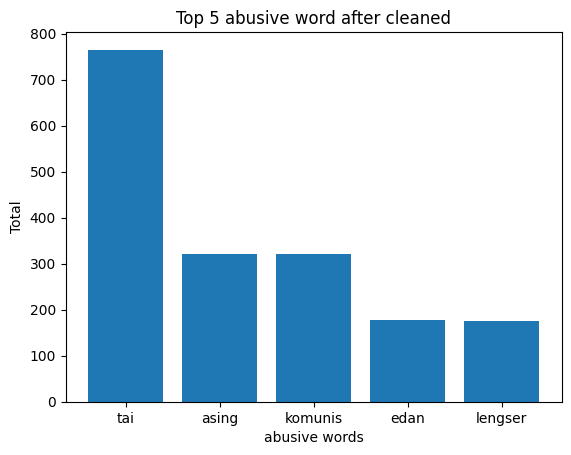

In [176]:
keys = [entry[0] for entry in top_5_cleaned]
values = [entry[1] for entry in top_5_cleaned]
plt.bar(keys, values)

# Add labels and title
plt.xlabel('abusive words')
plt.ylabel('Total')
plt.title('Top 5 abusive word after cleaned')

# Show the plot
plt.show()

# Membuat database

In [61]:
import sqlite3

In [62]:
conn = sqlite3.connect('C:/Users/Bani/binar-data-science/Gold Challenge Binar _ DSC10_Alfian Bani Kusuma/tmp.db')

In [63]:
conn.execute("""
CREATE TABLE tweet_cleaning_7 (cleaned_new_tweet char(1000))
""")
conn.commit()

In [19]:
# conn.execute("""DROP TABLE IF EXISTS tweet_cleaning_7;""")
# conn.commit()

In [64]:
df_tweet['cleaned_new_tweet'] = df_tweet['Tweet'].apply(lambda x: text_cleaning_other(x))

In [65]:
for idx,x in enumerate(df_tweet['cleaned_new_tweet'].values):
    query = f"INSERT INTO tweet_cleaning_7 (cleaned_new_tweet) VALUES ( '{x}');"
    cursors = conn.execute(query)
conn.commit()
#     break

In [66]:
results = [x[0] for x in conn.execute('select cleaned_new_tweet FROM tweet_cleaning_7;')]

In [67]:
for idx,r in enumerate(results):
    print(r)
    
    if idx == 1:
        break

disat semua cowok berusaha melacak perhatian gue kamu lantas remehkan perhatian yang gue kasih khusus ke kamu basic kamu cowok
rt siapa yang telat memberi tau eluedan gue bergaul dengan ciga  jifla calis sama siapa itu licew juga


In [89]:
#conn = sqlite3.connect('C:/Users/Bani/binar-data-science/tmp3.db')

In [6]:
#conn.execute("""
#CREATE TABLE tweet_cleaning_base_2 (id INTEGER PRIMARY KEY AUTOINCREMENT, tweet char(1000), cleaned_new_tweet char(1000))
#""")
#conn.commit()

In [32]:
#df_tweet[['Tweet', 'cleaned_text_abusive']].values

In [87]:
#for x,y in df_tweet[['Tweet', 'cleaned_text_abusive']].values:
#    x = x.encode('latin1')
#    y = y.encode('latin1')
#    query = "INSERT INTO tweet_cleaning_base_2 (tweet, cleaned_new_tweet) VALUES (?,?)"
#    cursors = conn.execute(query, (x,y))
#conn.commit()

In [88]:
#res = conn.execute("""
#select * from tweet_cleaning_base_2
#""")
#conn.commit()

In [33]:
#for idx,i in enumerate(res):
#    if idx == 10:
#        break
#    print(i[0])
 #   print(i[1])
#    print("")

In [1]:
# def read_database():
#     if request.method == "POST":
#         showed_index = request.form['inputIndex']
#         result_from_database = read_table(target_index=showed_index)
#         previous_text = result_from_database[0]
#         cleaned_text = result_from_database[1]
#         json_response = {
#             'Index': showed_index,
#             'Previous_text': previous_text,
#             'Cleaned_text': cleaned_text
#         }
#         json_response = jsonify(json_response)
#         return json_response
#     else:
#         return ("read_database.html")

 # Analisis cont.

In [69]:
df = pd.read_csv('C:/Users/Bani/binar-data-science/Gold Challenge Binar _ DSC10_Alfian Bani Kusuma/data/data.csv', encoding='latin-1')

In [102]:
new_df = df.loc[df['HS_Individual'] == 1, ['Tweet', 'HS_Individual']]
print(new_df)

                                                   Tweet  HS_Individual
0      - disaat semua cowok berusaha melacak perhatia...              1
10     Setidaknya gw punya jari tengah buat lu, sebel...              1
11     USER USER USER USER BANCI KALENG MALU GA BISA ...              1
13     Aktor huruhara 98 Prabowo S ingin lengserkan p...              1
14     USER Bu guru enakan jadi jablay atau guru esde...              1
...                                                  ...            ...
13155  USER USER Makannya w suruh baca APBN ..biar ga...              1
13157  USER Pak Recep..............anda salah, itu gu...              1
13161  brengsek itu orang terbuat dr apa bikin gue be...              1
13164  USER jangan asal ngomong ndasmu. congor lu yg ...              1
13168  USER Mana situ ngasih(": itu cuma foto ya kuti...              1

[3575 rows x 2 columns]


In [105]:
new_df['total_char'] = new_df['Tweet'].apply(len)


In [106]:
new_df['total_char']

0        138
10        94
11       110
13        74
14        93
        ... 
13155    230
13157    141
13161     63
13164     61
13168     53
Name: total_char, Length: 3575, dtype: int64

In [104]:
new_df['total_word'] = new_df['Tweet'].apply(lambda sent: len(sent.split()))

In [107]:
new_df['total_word']

0        25
10       15
11       20
13       10
14       15
         ..
13155    39
13157    20
13161    11
13164    10
13168    10
Name: total_word, Length: 3575, dtype: int64

In [110]:
new_df[['total_char','total_word']].corr()

,total_char,total_word
total_char,1.000000,0.947383
total_word,0.947383,1.000000


<Axes: xlabel='total_char', ylabel='total_word'>

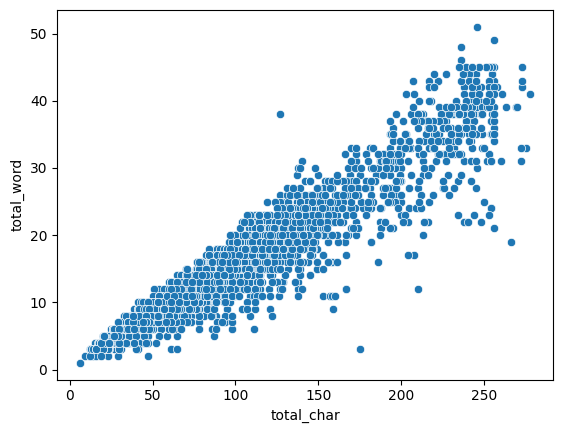

In [113]:
sns.scatterplot(x=new_df['total_char'], y=new_df['total_word'])

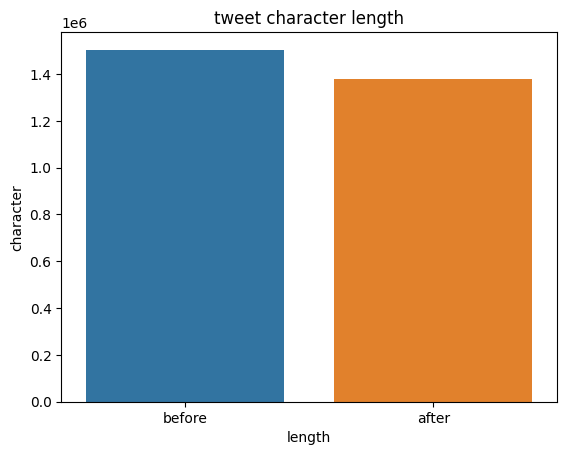

In [151]:

categories_tweet = ['before', 'after']
values_tweet = [1503936, 1379520]

# Step 3: Create the bar plot
sns.barplot(x=categories_tweet, y=values_tweet)

# Optional: Customize the plot
plt.title('tweet character length')
plt.xlabel('length')
plt.ylabel('character')

# Display the plot
plt.show()

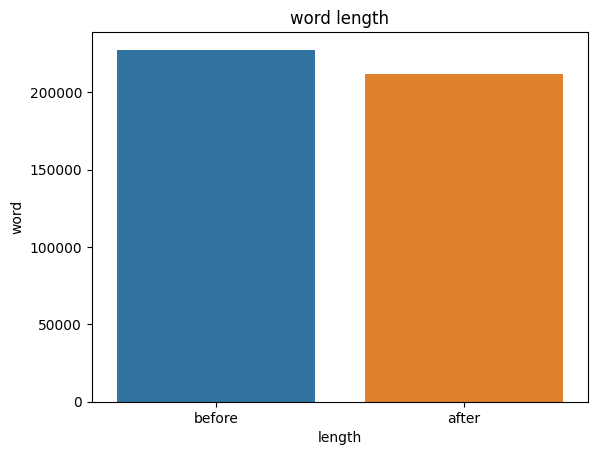

In [152]:

categories_word = ['before', 'after']
values_word = [227588, 211582]

# Step 3: Create the bar plot
sns.barplot(x=categories_word, y=values_word)

# Optional: Customize the plot
plt.title('word length')
plt.xlabel('length')
plt.ylabel('word')

# Display the plot
plt.show()

In [154]:
df_tweet[['length_of_tweet','clean_tweet_length']].corr()

,length_of_tweet,clean_tweet_length
length_of_tweet,1.000000,0.945641
clean_tweet_length,0.945641,1.000000


<Axes: xlabel='length_of_tweet', ylabel='clean_tweet_length'>

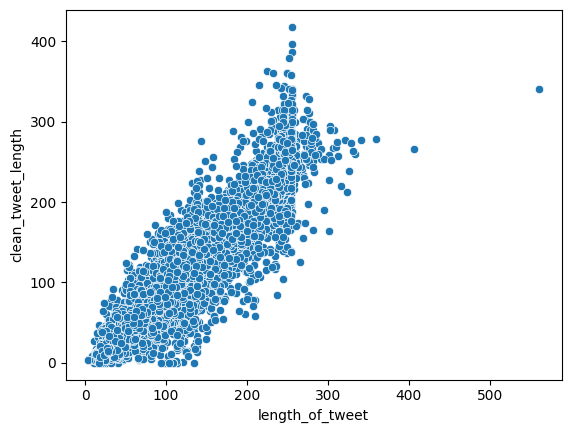

In [156]:
sns.scatterplot(x=df_tweet['clean_tweet_length'], y=df_tweet['length_of_tweet'])